### Import Dependencies

In [155]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import json

### Load Output csv file of the second Experiment

In [156]:
new_column_names = ['Table Name', 'Row Index', 'Column Index', 'Retrieved Annotation']
df_output = pd.read_csv("DataSets/Valid/cea annotation/output_with_row_context.csv", header=None, names=new_column_names) # Give appropriate path
df_output.head()

,Table Name,Row Index,Column Index,Retrieved Annotation
0,IUPOCN5C,1,0,http://www.wikidata.org/entity/Q6386554
1,IUPOCN5C,2,0,http://www.wikidata.org/entity/Q6500028
2,BQC7DZZR,1,0,http://www.wikidata.org/entity/Q4975221
3,BQC7DZZR,2,0,http://www.wikidata.org/entity/Q7996163
4,BQC7DZZR,3,0,http://www.wikidata.org/entity/Q6858435


In [157]:
df_output.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4247 entries, 0 to 4246
Data columns (total 4 columns):
Table Name              4247 non-null object
Row Index               4247 non-null int64
Column Index            4247 non-null int64
Retrieved Annotation    4015 non-null object
dtypes: int64(2), object(2)
memory usage: 132.8+ KB


### Retrieve and Analyse returned NaN by the API 

In [158]:
# Retrieve all rows with NaN values in a specific column
nan_rows = df_output[df_output["Retrieved Annotation"].isnull()]

# Print the resulting dataframe
print(nan_rows)

     Table Name  Row Index  Column Index Retrieved Annotation
27     9BGB7SWG          1             0                  NaN
28     9BGB7SWG          2             0                  NaN
29     9BGB7SWG          3             0                  NaN
30     NBR61LS1          1             0                  NaN
31     NBR61LS1          2             0                  NaN
...         ...        ...           ...                  ...
4119   1Q9AQVZ4          5             0                  NaN
4121   1Q9AQVZ4          6             0                  NaN
4123   1Q9AQVZ4          7             0                  NaN
4125   1Q9AQVZ4          8             0                  NaN
4127   1Q9AQVZ4          9             0                  NaN

[232 rows x 4 columns]


In [159]:
# Exploring the first 10 rows
nan_rows[:10]

,Table Name,Row Index,Column Index,Retrieved Annotation
27,9BGB7SWG,1,0,NaN
28,9BGB7SWG,2,0,NaN
29,9BGB7SWG,3,0,NaN
30,NBR61LS1,1,0,NaN
31,NBR61LS1,2,0,NaN
83,AW4BZJGK,2,0,NaN
84,AW4BZJGK,3,0,NaN
86,AW4BZJGK,5,0,NaN
88,AW4BZJGK,7,0,NaN
90,3S53OZSF,1,0,NaN


In [160]:
# Mapping with the value
new_column_names = ['Table Name', 'Row Index', 'Column Index', 'Target Annotation']
cea_gt = pd.read_csv(f"DataSets/Valid/gt/cea_gt.csv", header=None, names=new_column_names) # Give appropriate path
values = {}
for index, row in nan_rows.iterrows():
    # Load the dataframe
    df = pd.read_csv(f"DataSets/Valid/tables/{row[0]}.csv", header=None)
    annotation = cea_gt[(cea_gt.iloc[:,0] == row[0]) & (cea_gt.iloc[:,1] == row[1]) & (cea_gt.iloc[:,2] == row[2])].iloc[:,3].values[0]
    cell_value = df.iloc[row[1], row[2]]
    values[cell_value] = annotation

In [161]:
values

{'City of Porsmouth': 'http://www.wikidata.org/entity/Q21683233',
 'Rutnand': 'http://www.wikidata.org/entity/Q23107',
 'Nort Linconshire': 'http://www.wikidata.org/entity/Q175945',
 'Notthumberland': 'http://www.wikidata.org/entity/Q23079',
 'South Gloucfstershire': 'http://www.wikidata.org/entity/Q1369280',
 'Eurqn': 'http://www.wikidata.org/entity/Q1375110',
 'Rockaway Crehk': 'http://www.wikidata.org/entity/Q7354950',
 'Cale Crehk': 'http://www.wikidata.org/entity/Q22381243',
 'Haggart Crek': 'http://www.wikidata.org/entity/Q22585473',
 'awhaka Creek.': 'http://www.wikidata.org/entity/Q32235807',
 'LittleMuddy Rives': 'http://www.wikidata.org/entity/Q6651078',
 'Califorpia Slowgh': 'http://www.wikidata.org/entity/Q49871782',
 'Hjghland Creek': 'http://www.wikidata.org/entity/Q5758754',
 'utherford Cueek': 'http://www.wikidata.org/entity/Q7383336',
 'Caigieburn.': 'http://www.wikidata.org/entity/Q32169041',
 'Kennegy Creek': 'http://www.wikidata.org/entity/Q32236226',
 'Firvt Rapids

In [162]:
print(f"Total number of missing entities: {len(values)}")

Total number of missing entities: 232


In [163]:
# join prediction and target dataframes
merged_df = pd.merge(cea_gt, df_output, on=['Table Name', 'Row Index', 'Column Index'])

In [164]:
merged_df.head()

,Table Name,Row Index,Column Index,Target Annotation,Retrieved Annotation
0,IUPOCN5C,1,0,http://www.wikidata.org/entity/Q6386554,http://www.wikidata.org/entity/Q6386554
1,IUPOCN5C,2,0,http://www.wikidata.org/entity/Q6500028,http://www.wikidata.org/entity/Q6500028
2,BQC7DZZR,1,0,http://www.wikidata.org/entity/Q4975221,http://www.wikidata.org/entity/Q4975221
3,BQC7DZZR,2,0,http://www.wikidata.org/entity/Q7996163,http://www.wikidata.org/entity/Q7996163
4,BQC7DZZR,3,0,http://www.wikidata.org/entity/Q6858435,http://www.wikidata.org/entity/Q6858435


In [166]:
# Add Cell Content
def retrieve_cell_value(row):
    df = pd.read_csv(f"DataSets/Valid/tables/{row['Table Name']}.csv", header=None)
    cell_value = df.iloc[row["Row Index"], row["Column Index"]]
    return cell_value
    
merged_df["Cell Value"] = merged_df.apply(lambda row: retrieve_cell_value(row), axis=1)

In [167]:
merged_df

,Table Name,Row Index,Column Index,Target Annotation,Retrieved Annotation,Cell Value
0,IUPOCN5C,1,0,http://www.wikidata.org/entity/Q6386554,http://www.wikidata.org/entity/Q6386554,Kelso Township
1,IUPOCN5C,2,0,http://www.wikidata.org/entity/Q6500028,http://www.wikidata.org/entity/Q6500028,Laurel Township
2,BQC7DZZR,1,0,http://www.wikidata.org/entity/Q4975221,http://www.wikidata.org/entity/Q4975221,Brookville Township
3,BQC7DZZR,2,0,http://www.wikidata.org/entity/Q7996163,http://www.wikidata.org/entity/Q7996163,Miller Township
4,BQC7DZZR,3,0,http://www.wikidata.org/entity/Q6858435,http://www.wikidata.org/entity/Q6858435,Mill Township
...,...,...,...,...,...,...
4242,AMTEIF56,2,1,http://www.wikidata.org/entity/Q15981425,http://www.wikidata.org/entity/Q15981425,Edwin Swift Balch
4243,AMTEIF56,3,0,http://www.wikidata.org/entity/Q12716967,http://www.wikidata.org/entity/Q12716967,Mount Barre
4244,AMTEIF56,3,1,http://www.wikidata.org/entity/Q15973993,http://www.wikidata.org/entity/Q15973993,Michel Barré
4245,AMTEIF56,4,0,http://www.wikidata.org/entity/Q6923695,http://www.wikidata.org/entity/Q6923695,Mount Sir James MacBrien


In [168]:
wrong_retrieval = merged_df[merged_df["Target Annotation"] != merged_df["Retrieved Annotation"]]

In [169]:
wrong_retrieval

,Table Name,Row Index,Column Index,Target Annotation,Retrieved Annotation,Cell Value
27,9BGB7SWG,1,0,http://www.wikidata.org/entity/Q21683233,NaN,City of Porsmouth
28,9BGB7SWG,2,0,http://www.wikidata.org/entity/Q23107,NaN,Rutnand
29,9BGB7SWG,3,0,http://www.wikidata.org/entity/Q175945,NaN,Nort Linconshire
30,NBR61LS1,1,0,http://www.wikidata.org/entity/Q23079,NaN,Notthumberland
31,NBR61LS1,2,0,http://www.wikidata.org/entity/Q1369280,NaN,South Gloucfstershire
...,...,...,...,...,...,...
4126,1Q9AQVZ4,8,2,http://www.wikidata.org/entity/Q2095374,http://www.wikidata.org/entity/Q154668,patrician
4127,1Q9AQVZ4,9,0,http://www.wikidata.org/entity/Q15874307,NaN,De Liqt
4128,1Q9AQVZ4,9,2,http://www.wikidata.org/entity/Q2095374,http://www.wikidata.org/entity/Q154668,patrician
4137,ZB2ILR19,1,0,http://www.wikidata.org/entity/Q2730371,http://www.wikidata.org/entity/Q108111059,Sicilian revolt


In [170]:
merged_df[merged_df["Target Annotation"] == merged_df["Retrieved Annotation"]]

,Table Name,Row Index,Column Index,Target Annotation,Retrieved Annotation,Cell Value
0,IUPOCN5C,1,0,http://www.wikidata.org/entity/Q6386554,http://www.wikidata.org/entity/Q6386554,Kelso Township
1,IUPOCN5C,2,0,http://www.wikidata.org/entity/Q6500028,http://www.wikidata.org/entity/Q6500028,Laurel Township
2,BQC7DZZR,1,0,http://www.wikidata.org/entity/Q4975221,http://www.wikidata.org/entity/Q4975221,Brookville Township
3,BQC7DZZR,2,0,http://www.wikidata.org/entity/Q7996163,http://www.wikidata.org/entity/Q7996163,Miller Township
4,BQC7DZZR,3,0,http://www.wikidata.org/entity/Q6858435,http://www.wikidata.org/entity/Q6858435,Mill Township
...,...,...,...,...,...,...
4242,AMTEIF56,2,1,http://www.wikidata.org/entity/Q15981425,http://www.wikidata.org/entity/Q15981425,Edwin Swift Balch
4243,AMTEIF56,3,0,http://www.wikidata.org/entity/Q12716967,http://www.wikidata.org/entity/Q12716967,Mount Barre
4244,AMTEIF56,3,1,http://www.wikidata.org/entity/Q15973993,http://www.wikidata.org/entity/Q15973993,Michel Barré
4245,AMTEIF56,4,0,http://www.wikidata.org/entity/Q6923695,http://www.wikidata.org/entity/Q6923695,Mount Sir James MacBrien


### Detecting the language for each cell using the API and store them in a dictionary (stored)

Since the free plan for the API gives only a limited number of requests per month (about 1000), we run the following cells only once then save the results and make them available later on. The API is: Language Detection: https://rapidapi.com/detectlanguage/api/language-detection-2/

In [136]:
merged_df["Cell Value"].values.tolist()

['Kelso Township',
 'Laurel Township',
 'Brookville Township',
 'Miller Township',
 'Mill Township',
 'Greenville Township',
 'Princeton Township',
 'Noble Township',
 'Noble Township',
 'Noble Township',
 'Noble Township',
 'Noble Township',
 'Abington Township',
 'Concord Township',
 'Concord Township',
 'Hickory Grove Township',
 'Ohio Township',
 'Ohio Township',
 'Ohio Township',
 'Warren Township',
 'Warren Township',
 'Florida Township',
 'Salt Creek Township',
 'Salt Creek Township',
 'Salt Creek Township',
 'La Belle',
 'Aconit',
 'City of Porsmouth',
 'Rutnand',
 'Nort Linconshire',
 'Notthumberland',
 'South Gloucfstershire',
 'flag of Dayton',
 'Dayton',
 'flag of Victoria',
 'Victoria',
 '34th Street',
 'Haneda Airport Terminal 3 Station',
 'Mas Blau',
 'Colma station',
 'Prat de Llobregat',
 'Dongbaek Station',
 'Tangqiao station',
 'Magenta railway station',
 'Nation',
 'Logan',
 'Yangjeong Station',
 'Jangsan Station',
 'Namsan Station',
 'Myrtle Avenue',
 '181st Street

In [102]:
!pip install detectlanguage

In [103]:
import detectlanguage
# API: Language Detection: https://rapidapi.com/detectlanguage/api/language-detection-2/
# https://detectlanguage.com/private
detectlanguage.configuration.api_key = ""
detectlanguage.detect(["Musée Saint-Raymoqd, 26399", "Hallo, ich bin Achraf und ich habe 18 Jahre alt"])

DetectLanguageError: Your access is temporary suspended because usage exceeded current plan limits. You can track your usage statistics and upgrade your plan at https://detectlanguage.com/private

In [ ]:
detectlanguage.detect(["Musée Saint-Raymoqd, 26399"])

In [ ]:
merged_df["Cell Value"].values.tolist()[:700]

In [ ]:
values = merged_df["Cell Value"].values.tolist()
detect_languages = detectlanguage.detect(values)

In [ ]:
len(detect_languages)

In [ ]:
detect_languages

In [ ]:
values

In [ ]:
# Store them as a dictionary
mapping = {}
for value, language in zip(values, detect_languages):
    mapping[value] = language

# Save dictionary to a JSON file
with open('detected_languages.json', 'w') as file:
    json.dump(mapping, file)

### Loading the languages in new_mapping dictionary

In [171]:
# Load the JSON file
with open('detected_languages.json', 'r') as file:
    mapping = json.load(file)

# 'data' now contains the dictionary loaded from the JSON file
print(mapping)

{'Kelso Township': [{'language': 'en', 'isReliable': True, 'confidence': 6.435}, {'language': 'de', 'isReliable': False, 'confidence': 7.92}, {'language': 'sv', 'isReliable': False, 'confidence': 4.95}], 'Laurel Township': [{'language': 'en', 'isReliable': True, 'confidence': 6.4}], 'Brookville Township': [{'language': 'en', 'isReliable': True, 'confidence': 7.92}, {'language': 'de', 'isReliable': False, 'confidence': 7.92}], 'Miller Township': [{'language': 'en', 'isReliable': True, 'confidence': 6.57}, {'language': 'de', 'isReliable': False, 'confidence': 7.92}, {'language': 'pt', 'isReliable': False, 'confidence': 5.22}], 'Mill Township': [{'language': 'en', 'isReliable': True, 'confidence': 5.76}, {'language': 'de', 'isReliable': False, 'confidence': 7.92}, {'language': 'fr', 'isReliable': False, 'confidence': 3.6}], 'Greenville Township': [{'language': 'en', 'isReliable': True, 'confidence': 6.14}], 'Princeton Township': [{'language': 'en', 'isReliable': True, 'confidence': 8.1}, 

In [172]:
# Example of the language result for "Kelso Township" cell value
mapping['Kelso Township']

[{'language': 'en', 'isReliable': True, 'confidence': 6.435},
 {'language': 'de', 'isReliable': False, 'confidence': 7.92},
 {'language': 'sv', 'isReliable': False, 'confidence': 4.95}]

The API returned multiple values (1 or more) for each value with two attributes: isReliable and confidence score. Therefore, we select the language with isReliable equal to True.

In [173]:
# Filter out based on isReliable = True (first item) and assign 'en' for empty detection
new_mapping = {}
for key, value in mapping.items():
    if (len(value) == 0):
        new_mapping[key] = "en"
    else:
        new_mapping[key] = value[0]['language']        
print(new_mapping)

{'Kelso Township': 'en', 'Laurel Township': 'en', 'Brookville Township': 'en', 'Miller Township': 'en', 'Mill Township': 'en', 'Greenville Township': 'en', 'Princeton Township': 'en', 'Noble Township': 'en', 'Abington Township': 'gd', 'Concord Township': 'en', 'Hickory Grove Township': 'en', 'Ohio Township': 'en', 'Warren Township': 'en', 'Florida Township': 'en', 'Salt Creek Township': 'en', 'La Belle': 'en', 'Aconit': 'fr', 'City of Porsmouth': 'en', 'Rutnand': 'tl', 'Nort Linconshire': 'lt', 'Notthumberland': 'it', 'South Gloucfstershire': 'en', 'flag of Dayton': 'en', 'Dayton': 'en', 'flag of Victoria': 'en', 'Victoria': 'en', '34th Street': 'en', 'Haneda Airport Terminal 3 Station': 'en', 'Mas Blau': 'pt', 'Colma station': 'it', 'Prat de Llobregat': 'ca', 'Dongbaek Station': 'en', 'Tangqiao station': 'en', 'Magenta railway station': 'en', 'Nation': 'en', 'Logan': 'en', 'Yangjeong Station': 'en', 'Jangsan Station': 'ms', 'Namsan Station': 'en', 'Myrtle Avenue': 'en', '181st Street'

In [174]:
new_mapping

{'Kelso Township': 'en',
 'Laurel Township': 'en',
 'Brookville Township': 'en',
 'Miller Township': 'en',
 'Mill Township': 'en',
 'Greenville Township': 'en',
 'Princeton Township': 'en',
 'Noble Township': 'en',
 'Abington Township': 'gd',
 'Concord Township': 'en',
 'Hickory Grove Township': 'en',
 'Ohio Township': 'en',
 'Warren Township': 'en',
 'Florida Township': 'en',
 'Salt Creek Township': 'en',
 'La Belle': 'en',
 'Aconit': 'fr',
 'City of Porsmouth': 'en',
 'Rutnand': 'tl',
 'Nort Linconshire': 'lt',
 'Notthumberland': 'it',
 'South Gloucfstershire': 'en',
 'flag of Dayton': 'en',
 'Dayton': 'en',
 'flag of Victoria': 'en',
 'Victoria': 'en',
 '34th Street': 'en',
 'Haneda Airport Terminal 3 Station': 'en',
 'Mas Blau': 'pt',
 'Colma station': 'it',
 'Prat de Llobregat': 'ca',
 'Dongbaek Station': 'en',
 'Tangqiao station': 'en',
 'Magenta railway station': 'en',
 'Nation': 'en',
 'Logan': 'en',
 'Yangjeong Station': 'en',
 'Jangsan Station': 'ms',
 'Namsan Station': 'en',

### Some Analysis for the Cells Languages

{'en': 2113, 'gd': 14, 'fr': 70, 'tl': 5, 'lt': 11, 'it': 34, 'pt': 94, 'ca': 48, 'ms': 11, 'es': 135, 'sa': 2, 'lg': 3, 'is': 7, 'sco': 8, 'uz': 9, 'ga': 11, 'pl': 62, 'sr': 7, 'et': 40, 'tlh': 7, 'vo': 8, 'st': 5, 'mg': 7, 'tn': 3, 'oc': 6, 'nl': 61, 'sw': 3, 'eu': 17, 'war': 8, 'da': 68, 'id': 12, 'ar': 1, 'ceb': 4, 'br': 7, 'tr': 24, 'no': 66, 'gv': 14, 'xh': 8, 'sn': 4, 'la': 17, 'rn': 2, 'kl': 6, 'ig': 1, 'de': 147, 'sk': 25, 'hmn': 3, 'vi': 4, 'cy': 26, 'ie': 1, 'sv': 17, 'bs': 2, 'ro': 6, 'gl': 5, 'om': 3, 'cs': 34, 'ak': 2, 'sl': 16, 'lv': 7, 'ts': 2, 'af': 6, 'sq': 3, 'zu': 4, 'sm': 2, 'qu': 6, 'ha': 5, 'fj': 2, 'mi': 1, 'ln': 5, 'ia': 6, 'hu': 10, 'eo': 6, 'fi': 7, 'aa': 2, 'haw': 1, 'jw': 6, 'co': 5, 'gn': 7, 'mt': 2, 'so': 8, 'su': 5, 'lb': 3, 'fo': 2, 'bi': 2, 'rm': 3, 'to': 1, 'tk': 3, 'tt': 2, 'ny': 3, 'fy': 2, 'mfe': 1, 'ht': 1, 'rw': 3, 've': 3, 'za': 4, 'hr': 1, 'crs': 3, 'na': 2, 'wo': 1, 'ss': 1, 'kha': 1}


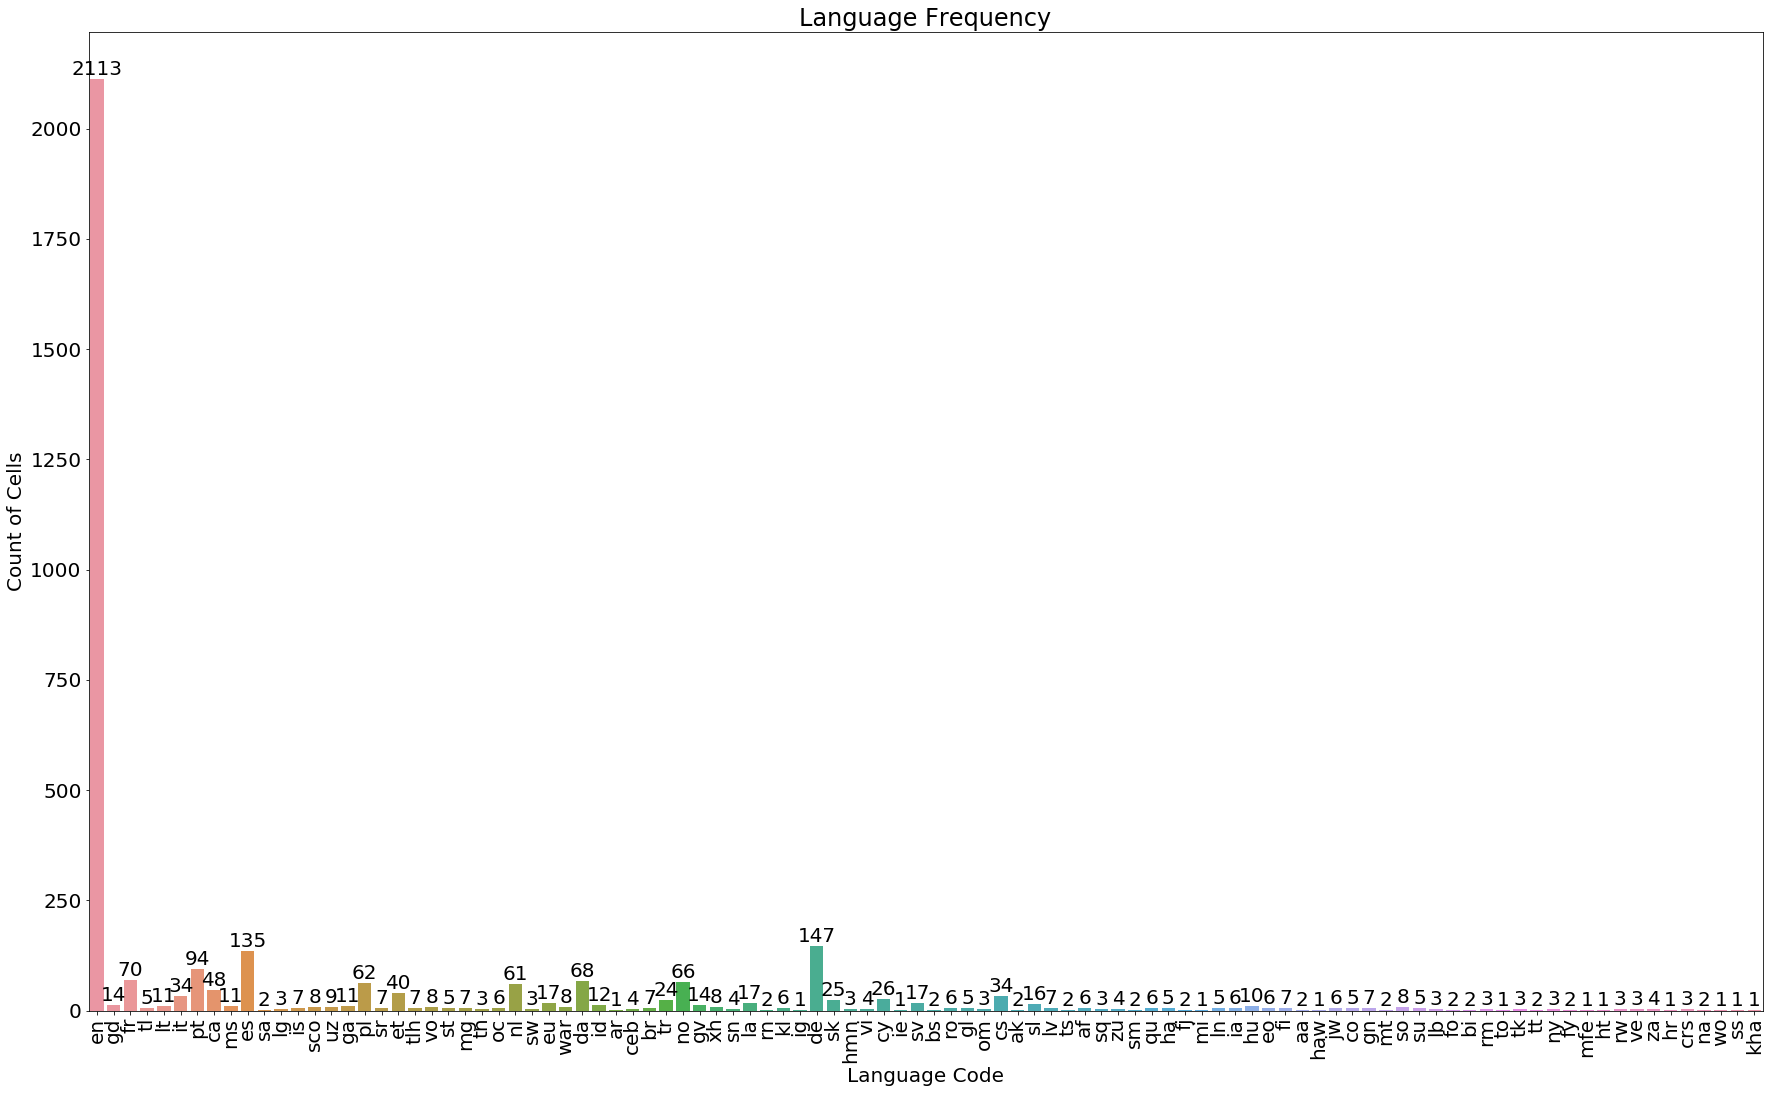

In [175]:
# See the languages of the CEA cells
languages_count = {}

for key, detected_language in new_mapping.items():
    if detected_language in languages_count.keys():
        languages_count[detected_language] = languages_count[detected_language] + 1
    else:
        languages_count[detected_language] = 1

print(languages_count)

# Transform each value into a list
languages_count = {key: [value] for key, value in languages_count.items()}
    
languages_count = pd.DataFrame(languages_count)

# Transpose the DataFrame
df_transposed = languages_count.transpose()

# Reset the index and rename the columns
df_transposed = df_transposed.reset_index()
df_transposed.columns = ['Language Code', 'Count']

# Increase the font size
plt.rcParams['font.size'] = 20

# Plotting the bar plot using Seaborn
plt.figure(figsize=(30, 18))
sns.barplot(data=df_transposed, x='Language Code', y='Count')

# Rotating the x-axis labels
plt.xticks(rotation=90)

# Adding labels and title
plt.xlabel('Language Code')
plt.ylabel('Count of Cells')
plt.title('Language Frequency')

# Annotating the bar plot with exact numbers
for index, row in df_transposed.iterrows():
    plt.text(index, row['Count'], str(row['Count']), ha='center', va='bottom')


# Display the plot
plt.show()

'en': English, 'gd': Scottish Gaelic, 'fr': French, 'tl': Tagalog, 'lt': Lithuanian, 'it': Italian

'pt': Portuguese, 'ca': Catalan, 'ms': Malay, 'es': Spanish, 'sa': Sanskrit, 'lg': Luganda

'is': Icelandic, 'sco': Scots, 'uz': Uzbek, 'ga': Irish, 'pl': Polish, 'sr': Serbian

'et': Estonian, 'tlh': Klingon, 'vo': Volapük, 'st': Southern Sotho, 'mg': Malagasy, 'tn': Tswana

'oc': Occitan, 'nl': Dutch, 'sw': Swahili, 'eu': Basque, 'war': Waray, 'da': Danish

'id': Indonesian, 'ar': Arabic, 'ceb': Cebuano, 'br': Breton, 'tr': Turkish, 'no': Norwegian

'gv': Manx, 'xh': Xhosa, 'sn': Shona, 'la': Latin, 'rn': Kirundi, 'kl': Greenlandic

'ig': Igbo, 'de': German, 'sk': Slovak, 'hmn': Hmong, 'vi': Vietnamese, 'cy': Welsh

'ie': Interlingue, 'sv': Swedish, 'bs': Bosnian, 'ro': Romanian, 'gl': Galician, 'om': Oromo

'cs': Czech, 'ak': Akan, 'sl': Slovenian, 'lv': Latvian, 'ts': Tsonga, 'af': Afrikaans

'sq': Albanian, 'zu': Zulu, 'sm': Samoan, 'qu': Quechua, 'ha': Hausa, 'fj': Fijian

'mi': Maori, 'ln': Lingala, 'ia': Interlingua, 'hu': Hungarian, 'eo': Esperanto, 'fi': Finnish

'aa': Afar, 'haw': Hawaiian, 'jw': Javanese, 'co': Corsican, 'gn': Guarani, 'mt': Maltese

'so': Somali, 'su': Sundanese, 'lb': Luxembourgish, 'fo': Faroese, 'bi': Bislama, 'rm': Romansh

'to': Tongan, 'tk': Turkmen, 'tt': Tatar, 'ny': Chichewa, 'fy': Western Frisian, 'mfe': Mauritian Creole

'ht': Haitian Creole, 'rw': Kinyarwanda, 've': Venda, 'za': Zhuang, 'hr': Croatian, 'crs': Seychellois Creole

'na': Nauruan, 'wo': Wolof, 'ss': Swati, 'kha': Khasi

Let's see some examples:

In [176]:
# Select English, French, Deutsch, Espagnol, Italian, and Arabic strings
selected_english = [key for key, value in new_mapping.items() if value == "en"]
selected_french = [key for key, value in new_mapping.items() if value == "fr"]
selected_deutsch = [key for key, value in new_mapping.items() if value == "de"]
selected_espagnol = [key for key, value in new_mapping.items() if value == "es"]
selected_italian = [key for key, value in new_mapping.items() if value == "it"]
selected_arabic = [key for key, value in new_mapping.items() if value == "ar"]
print("Examples of English cells:")
print(selected_english[:10])
print("Examples of French cells:")
print(selected_french[:10])
print("Examples of Deutsch cells:")
print(selected_deutsch[:10])
print("Examples of Espagnol cells:")
print(selected_espagnol[:10])
print("Examples of Italian cells:")
print(selected_italian[:10])
print("Examples of Arabic cells:")
print(selected_arabic[:10])

Examples of English cells:
['Kelso Township', 'Laurel Township', 'Brookville Township', 'Miller Township', 'Mill Township', 'Greenville Township', 'Princeton Township', 'Noble Township', 'Concord Township', 'Hickory Grove Township']
Examples of French cells:
['Aconit', "Gare d'Austerlitz", 'LGV Sud-Est', 'LGV Nord', 'LGV Rhin-Rhône', 'LGV Interconnexion Est', 'UGC 22', 'Phi Vu', 'Ras el Ma', 'Oued Laou']
Examples of Deutsch cells:
['Bocken', 'Superboy', 'Stall Raitenhaslach 7 in Burghausen', 'Stall St.-Leonhard-Straße 24 in Rothenburg ob der Tauber', 'Stall Hauptstraße 20 in Reuth bei Erbendorf', 'Stall Krumbach 23; Krumbach 24 in Halsbach', 'Stall Lämmersreut 8 in Waldkirchen', 'Schweinestall Rottenegger Straße 1 in Wolnzach', 'Schweinestall Krottenbacher Straße 86 in Nürnberg', 'Stall Kronest 1 in Trostberg']
Examples of Espagnol cells:
['Pavones', 'San Juan de Dios', 'Las Paredes', 'Cale Crehk', 'ARA Rivadavia', 'Iglesia de Santa María de Baldós', 'Ponte Milvio', 'Saludos Amigos', '

In [177]:
# Number of total non-english cells
selected_non_english = [key for key, value in new_mapping.items() if value != "en"]
print(f"Total number of non-english cells: {len(selected_non_english)}")
print(f"Percentage of non-english cells: {(len(selected_non_english)/merged_df.shape[0])*100}%")

Total number of non-english cells: 1371
Percentage of non-english cells: 32.28161054862256%


## Correct Misspelling for the non annotated values (returned annotation = NaN) and Save the results 

In [ ]:
# load misspelling correction dictionary
with open('detected_languages.json', 'r') as file:
    
    mapping = json.load(file)

In [179]:
values_returning_nans = merged_df[merged_df["Retrieved Annotation"].isnull()]["Cell Value"].values.tolist()
values_returning_nans

['City of Porsmouth',
 'Rutnand',
 'Nort Linconshire',
 'Notthumberland',
 'South Gloucfstershire',
 'Eurqn',
 'Rockaway Crehk',
 'Cale Crehk',
 'Haggart Crek',
 'awhaka Creek.',
 'LittleMuddy Rives',
 'Califorpia Slowgh',
 'Hjghland Creek',
 'utherford Cueek',
 'Caigieburn.',
 'Kennegy Creek',
 'Firvt Rapids',
 'Frst Rapids',
 'First Uapids',
 'Cegar Rapids',
 'Frank{',
 'Bucy Barnes',
 'Robotmn',
 'Rbotman',
 'Guardia.',
 'Dart Vader',
 'Donald Pirce',
 'Mhtallo',
 'Ienji',
 'Raideq.',
 'Xelocity',
 'Cbble',
 'Gseen Man',
 'yborg',
 'Cybrg',
 'Vhe Major',
 'enry Heywood',
 'Inpector Gadget',
 'Micjael Peterson',
 'Darth Mcl.',
 'Eronze pendant in the form of a paired couple',
 'Bron}e pendant in the form#of a paired couple',
 'Pendant: cescent',
 'Quagruped Pendant',
 'Eagle pndant with detailed head.',
 'Silver Horseshoe Pendant, Yale University Art Galery, inv. 1929.409',
 'Agios Ioannis, Agios Vasilios Rethimno',
 'Frannlin',
 'Chiprewa Falls',
 'Marshfeld',
 'Eedarburg',
 'Muskeg

In [180]:
len(values_returning_nans)

232

In [209]:
# A function that corrects the misspelling
import requests
import time 

def correct_misspelling(word, language):
    # Bing Spell Check: https://rapidapi.com/microsoft-azure-org-microsoft-cognitive-services/api/bing-spell-check2/pricing
    responses = {}
#     url = "https://bing-spell-check2.p.rapidapi.com/spellcheck?setLang=fr"
#     headers = {
#         "X-RapidAPI-Key": "2c4fbea634msh2402e3c9ee624d0p18f865jsnc9c4f5b83730",
#         "X-RapidAPI-Host": "bing-spell-check2.p.rapidapi.com"
#     }
    
    # Retrieve the language
    # Load the JSON file
#     with open('detected_languages.json', 'r') as file:
#         mapping = json.load(file)

#     # Filter out based on isReliable = True (first item) and assign 'en' for empty detection
#     new_mapping = {}
#     for key, value in mapping.items():
#         if (len(value) == 0):
#             new_mapping[key] = "en"
#         else:
#             new_mapping[key] = value[0]['language']        
    
#     language = new_mapping[word]
    
    subscription_key = ""  
    headers = {
        "Ocp-Apim-Subscription-Key": subscription_key
    }
    

    url = "https://api.bing.microsoft.com/v7.0/spellcheck"
    
    # Perform your desired operations within the loop
    querystring = {"mode":"spell", "text": word, "mkt": f"{language}-{language}"}  # "mkt":"en-US"
    response = requests.get(url, headers=headers, params=querystring)
    responses[word] = response.json()
    
    print(responses)
    
    data = responses[word]["flaggedTokens"]

    for correction in data:
        token = correction["token"]
        suggestions = correction["suggestions"]
        correction_with_highest_score = max(suggestions, key=lambda x: x['score'])
        word = word.replace(token, correction_with_highest_score["suggestion"])
    
    time.sleep(1)
    
    return word

In [210]:
# Apply correction for all strings and save the results in a json file
get_correction_for_a_string = {}
for value in values_returning_nans:
    correction = correct_misspelling(value, new_mapping[value])
    get_correction_for_a_string[value] = correction

# Save dictionary to a JSON file
with open('correction_for_strings.json', 'w') as file:
    json.dump(get_correction_for_a_string, file)

{'City of Porsmouth': {'_type': 'SpellCheck', 'flaggedTokens': [{'offset': 8, 'token': 'Porsmouth', 'type': 'UnknownToken', 'suggestions': [{'suggestion': 'portsmouth', 'score': 1}]}], 'correctionType': 'High'}}
{'Rutnand': {'_type': 'SpellCheck', 'flaggedTokens': []}}
{'Nort Linconshire': {'_type': 'SpellCheck', 'flaggedTokens': [{'offset': 0, 'token': 'Nort', 'type': 'UnknownToken', 'suggestions': [{'suggestion': 'north', 'score': 1}]}, {'offset': 5, 'token': 'Linconshire', 'type': 'UnknownToken', 'suggestions': [{'suggestion': 'lincolnshire', 'score': 1}]}], 'correctionType': 'High'}}
{'Notthumberland': {'_type': 'SpellCheck', 'flaggedTokens': [{'offset': 0, 'token': 'Notthumberland', 'type': 'UnknownToken', 'suggestions': [{'suggestion': 'northumberland', 'score': 1}]}], 'correctionType': 'High'}}
{'South Gloucfstershire': {'_type': 'SpellCheck', 'flaggedTokens': [{'offset': 6, 'token': 'Gloucfstershire', 'type': 'UnknownToken', 'suggestions': [{'suggestion': 'gloucestershire', 'sc

{'Quagruped Pendant': {'_type': 'SpellCheck', 'flaggedTokens': [{'offset': 0, 'token': 'Quagruped', 'type': 'UnknownToken', 'suggestions': [{'suggestion': 'quadruped', 'score': 1}]}], 'correctionType': 'High'}}
{'Eagle pndant with detailed head.': {'_type': 'SpellCheck', 'flaggedTokens': [{'offset': 6, 'token': 'pndant', 'type': 'UnknownToken', 'suggestions': [{'suggestion': 'pendant', 'score': 1}]}], 'correctionType': 'High'}}
{'Silver Horseshoe Pendant, Yale University Art Galery, inv. 1929.409': {'_type': 'SpellCheck', 'flaggedTokens': [{'offset': 46, 'token': 'Galery', 'type': 'UnknownToken', 'suggestions': [{'suggestion': 'gallery', 'score': 1}]}], 'correctionType': 'High'}}
{'Agios Ioannis, Agios Vasilios Rethimno': {'_type': 'SpellCheck', 'flaggedTokens': [{'offset': 30, 'token': 'Rethimno', 'type': 'UnknownToken', 'suggestions': [{'suggestion': 'rethymno', 'score': 1}]}], 'correctionType': 'High'}}
{'Frannlin': {'_type': 'SpellCheck', 'flaggedTokens': [{'offset': 0, 'token': 'F

{'Tuscaloosa metropoltan area': {'_type': 'SpellCheck', 'flaggedTokens': [{'offset': 11, 'token': 'metropoltan', 'type': 'UnknownToken', 'suggestions': [{'suggestion': 'metropolitan', 'score': 1}]}], 'correctionType': 'High'}}
{'Topeka metropoliuan area': {'_type': 'SpellCheck', 'flaggedTokens': [{'offset': 7, 'token': 'metropoliuan', 'type': 'UnknownToken', 'suggestions': [{'suggestion': 'metropolitan', 'score': 1}]}], 'correctionType': 'High'}}
{'he Unifour.': {'_type': 'SpellCheck', 'flaggedTokens': []}}
{'Texarkana metropoitan area': {'_type': 'SpellCheck', 'flaggedTokens': [{'offset': 10, 'token': 'metropoitan', 'type': 'UnknownToken', 'suggestions': [{'suggestion': 'metropolitan', 'score': 1}]}], 'correctionType': 'High'}}
{'Terre Haute metropolitan aea': {'_type': 'SpellCheck', 'flaggedTokens': [{'offset': 25, 'token': 'aea', 'type': 'UnknownToken', 'suggestions': [{'suggestion': 'area', 'score': 1}]}], 'correctionType': 'High'}}
{'Tanlahassee metropolitan area': {'_type': 'Spel

{'Wsemen': {'_type': 'SpellCheck', 'flaggedTokens': [{'offset': 0, 'token': 'Wsemen', 'type': 'UnknownToken', 'suggestions': [{'suggestion': 'wremen', 'score': 1}]}], 'correctionType': 'High'}}
{'Scheeningen': {'_type': 'SpellCheck', 'flaggedTokens': []}}
{'Trassnheide': {'_type': 'SpellCheck', 'flaggedTokens': [{'offset': 0, 'token': 'Trassnheide', 'type': 'UnknownToken', 'suggestions': [{'suggestion': 'trassenheide', 'score': 1}]}], 'correctionType': 'High'}}
{'Egmopd aan Zee': {'_type': 'SpellCheck', 'flaggedTokens': [{'offset': 0, 'token': 'Egmopd', 'type': 'UnknownToken', 'suggestions': [{'suggestion': 'egmond', 'score': 1}]}], 'correctionType': 'High'}}
{'Wgstward Ho!': {'_type': 'SpellCheck', 'flaggedTokens': [{'offset': 0, 'token': 'Wgstward', 'type': 'UnknownToken', 'suggestions': [{'suggestion': 'westward', 'score': 1}]}], 'correctionType': 'High'}}
{'Planta da Cidade de Piracicba': {'_type': 'SpellCheck', 'flaggedTokens': [{'offset': 20, 'token': 'Piracicba', 'type': 'Unknow

{'Morrh Dam.': {'_type': 'SpellCheck', 'flaggedTokens': []}}
{'Brke Dam': {'_type': 'SpellCheck', 'flaggedTokens': [{'offset': 0, 'token': 'Brke', 'type': 'UnknownToken', 'suggestions': [{'suggestion': 'brake', 'score': 1}]}], 'correctionType': 'High'}}
{'Fonana Dam': {'_type': 'SpellCheck', 'flaggedTokens': [{'offset': 0, 'token': 'Fonana', 'type': 'UnknownToken', 'suggestions': [{'suggestion': 'fontana', 'score': 1}]}], 'correctionType': 'High'}}
{'Forw Peck Dam': {'_type': 'SpellCheck', 'flaggedTokens': []}}
{'Lausel Dam': {'_type': 'SpellCheck', 'flaggedTokens': [{'offset': 0, 'token': 'Lausel', 'type': 'UnknownToken', 'suggestions': [{'suggestion': 'klausel', 'score': 1}]}], 'correctionType': 'High'}}
{'Cronlee Dam': {'_type': 'SpellCheck', 'flaggedTokens': []}}
{'ufula Dam': {'_type': 'SpellCheck', 'flaggedTokens': []}}
{'Eidsfossen power statjon': {'_type': 'SpellCheck', 'flaggedTokens': [{'offset': 17, 'token': 'statjon', 'type': 'UnknownToken', 'suggestions': [{'suggestion': '

### Load the corrections from the json file

In [216]:
# Load the JSON file
with open('correction_for_strings.json', 'r') as file:
    get_correction_for_a_string = json.load(file)
get_correction_for_a_string

{'City of Porsmouth': 'City of portsmouth',
 'Rutnand': 'Rutnand',
 'Nort Linconshire': 'north lincolnshire',
 'Notthumberland': 'northumberland',
 'South Gloucfstershire': 'South gloucestershire',
 'Eurqn': 'euron',
 'Rockaway Crehk': 'Rockaway creek',
 'Cale Crehk': 'cane creek',
 'Haggart Crek': 'haggard crack',
 'awhaka Creek.': 'awhaka Creek.',
 'LittleMuddy Rives': 'little muddy river',
 'Califorpia Slowgh': 'california slough',
 'Hjghland Creek': 'highland Creek',
 'utherford Cueek': 'rutherford cheek',
 'Caigieburn.': 'craigieburn.',
 'Kennegy Creek': 'kennedy Creek',
 'Firvt Rapids': 'first Rapids',
 'Frst Rapids': 'first Rapids',
 'First Uapids': 'First aids',
 'Cegar Rapids': 'cedar Rapids',
 'Frank{': 'Frank{',
 'Bucy Barnes': 'bucky Barnes',
 'Robotmn': 'robotman',
 'Rbotman': 'robotman',
 'Guardia.': 'guardian',
 'Dart Vader': 'darth Vader',
 'Donald Pirce': 'Donald pierce',
 'Mhtallo': 'metallo',
 'Ienji': 'inegi',
 'Raideq.': 'Raideq.',
 'Xelocity': 'Xelocity',
 'Cbble'

In [217]:
len(list(get_correction_for_a_string.keys()))

232

### Dealing with strings without special characters

In [218]:
# Get strings with no special characters
import re

misspelled_strings_without_special_characters = []

def get_special_characters(string):
    pattern = r'[^\w\s]'
    matches = re.findall(pattern, string)
    return matches

for string in values_returning_nans:    
    special_chars = get_special_characters(string)
    if special_chars:
        continue
    else:
        misspelled_strings_without_special_characters.append(string)
        
print(misspelled_strings_without_special_characters)

['City of Porsmouth', 'Rutnand', 'Nort Linconshire', 'Notthumberland', 'South Gloucfstershire', 'Eurqn', 'Rockaway Crehk', 'Cale Crehk', 'Haggart Crek', 'LittleMuddy Rives', 'Califorpia Slowgh', 'Hjghland Creek', 'utherford Cueek', 'Kennegy Creek', 'Firvt Rapids', 'Frst Rapids', 'First Uapids', 'Cegar Rapids', 'Bucy Barnes', 'Robotmn', 'Rbotman', 'Dart Vader', 'Donald Pirce', 'Mhtallo', 'Ienji', 'Xelocity', 'Cbble', 'Gseen Man', 'yborg', 'Cybrg', 'Vhe Major', 'enry Heywood', 'Inpector Gadget', 'Micjael Peterson', 'Eronze pendant in the form of a paired couple', 'Quagruped Pendant', 'Frannlin', 'Chiprewa Falls', 'Marshfeld', 'Eedarburg', 'inochoe', 'clay oinochoe with waterfowl and geomftric ornaments', 'South Ionan Wild Goat Style oinochoe Berlin AS F 295', 'Sandvfjorden', 'Austpqllen', 'Ytre Sundcn', 'Isgjord', 'Sikuikitsoq', 'Vestertn', 'Bura Voe', 'Uhajn', 'Zucayd', 'Al Mwrays', 'l Muhayl', 'Ah Thulth', 'th Thulth', 'At Turbh', 'BtTurbah', ' Burayhah', 'Ar Rawnh', 'Portland Vintage 

In [219]:
print(f"Total number of misspelled strings without any special chars: {len(misspelled_strings_without_special_characters)}")

Total number of misspelled strings without any special chars: 161


In [220]:
# Apply correction for strings with non-special chars and check the API
results_after_corrections = 0

print("Applying the API to strings after correction")

# Apply the API to strings without the "."
for string in misspelled_strings_without_special_characters: 
    if not get_special_characters(string):
#         corrected_string = correct_misspelling(string, new_mapping[string])
        corrected_string = get_correction_for_a_string[string]
        
        params = {
                "action": "wbsearchentities",
                "format": "json",
                "language": "en",
                "limit": 50,
                "search": corrected_string
        }
        WIKIDATA_API_ENDPOINT = "https://www.wikidata.org/w/api.php"
        response = requests.get(WIKIDATA_API_ENDPOINT, params=params)
        data = response.json()
        if "search" in data:
            # If the API find an associated entity for the input
            if len(data["search"]) != 0:
                # Retrieve all possible entities
                possible_entities = [url["concepturi"].split("/")[-1] for url in data["search"]]
                # Target annotation
                target_annotation_url = merged_df[merged_df["Cell Value"] == string]["Target Annotation"].values.tolist()[0]
                target_annotation = target_annotation_url.split('/')[-1]           

                if target_annotation in possible_entities:
                    print(f"API result for {string} and the target is in there: {possible_entities}")
                    results_after_corrections = results_after_corrections + 1
                else:
                    print(f"API result for {string} and the target is not in there: {possible_entities}")
            else:
                print(f"API result for {string}: None")
        else:
            print(f"API result for {string}: None")

Applying the API to strings after correction
API result for City of Porsmouth and the target is in there: ['Q21683233', 'Q56447729', 'Q26263431', 'Q116820815', 'Q74529444', 'Q342803', 'Q5123874', 'Q5123875']
API result for Rutnand: None
API result for Nort Linconshire and the target is in there: ['Q175945', 'Q7055951', 'Q17582073', 'Q17016863', 'Q105908682', 'Q7055957', 'Q7055958', 'Q105087841', 'Q101005001', 'Q103187517', 'Q7055954', 'Q16902318', 'Q26609405', 'Q119802450', 'Q104416636', 'Q104606128', 'Q21685353', 'Q55083335']
API result for Notthumberland and the target is in there: ['Q23079', 'Q67535553', 'Q1181968', 'Q2420158', 'Q7059795', 'Q60576018', 'Q2879177', 'Q5355818', 'Q7059788', 'Q5633538', 'Q3344244', 'Q3023314', 'Q42886797', 'Q42886792', 'Q60750246', 'Q48817776', 'Q42896770', 'Q42886789', 'Q120041134', 'Q106500979', 'Q28027094', 'Q103855702', 'Q494164', 'Q505292', 'Q1752156', 'Q84881068', 'Q1359415', 'Q937673', 'Q582205', 'Q7059799', 'Q6386521', 'Q5865727', 'Q23463467', '

API result for Cybrg and the target is in there: ['Q235799', 'Q2466726', 'Q781870', 'Q1940930', 'Q4353528', 'Q2190756', 'Q28032829', 'Q57394189', 'Q55405540', 'Q50845831', 'Q7351562', 'Q55344757', 'Q48997181', 'Q97275242', 'Q5197888', 'Q64849253', 'Q117036371', 'Q22074477', 'Q1147262', 'Q1070661', 'Q30962895', 'Q700439', 'Q2518679', 'Q1138486', 'Q9291384', 'Q3984104', 'Q526546', 'Q1962137', 'Q1962395', 'Q22082112', 'Q955822', 'Q97189098', 'Q91263270', 'Q4219986', 'Q3008217', 'Q2759855', 'Q51540268', 'Q5197892', 'Q107814582', 'Q1147254', 'Q5197890', 'Q3008213', 'Q1770252', 'Q1147259', 'Q3699833', 'Q5197893', 'Q3699834', 'Q22077174', 'Q5197896', 'Q5197897']
API result for Vhe Major: None
API result for enry Heywood and the target is in there: ['Q89370324', 'Q49414389', 'Q89592586', 'Q76026395', 'Q49416267', 'Q118307565']
API result for Inpector Gadget and the target is in there: ['Q664840', 'Q1535654', 'Q18910399', 'Q6038380', 'Q6038377', 'Q63862225', 'Q108371052', 'Q132374', 'Q114448160

API result for Bbia de Arieș: None
API result for Cerdbc and the target is not in there: ['Q927067', 'Q1606686', 'Q1769002', 'Q1652193', 'Q56464072', 'Q1054900', 'Q95614568', 'Q37476447', 'Q55754234', 'Q35639626', 'Q100520562', 'Q5762589', 'Q23986831', 'Q10446605', 'Q14624704', 'Q100520560', 'Q24016728', 'Q24016727', 'Q24014149', 'Q37474636', 'Q104019308', 'Q37091978', 'Q105096042', 'Q37550609', 'Q37484472', 'Q37494442', 'Q105329289', 'Q2840028', 'Q5762586', 'Q95916824', 'Q19028964', 'Q85751315', 'Q115501463', 'Q115501465', 'Q118592666', 'Q115501464', 'Q61934793', 'Q30284634', 'Q20659553', 'Q38467131', 'Q54307749', 'Q37712931', 'Q84440958', 'Q79365849', 'Q39775738', 'Q84583921', 'Q77819506', 'Q40212869', 'Q51018927', 'Q46969299']
API result for Hwmuleștii Noi: None
API result for Humuești: None
API result for Florenl and the target is not in there: ['Q2044', 'Q20973254', 'Q23907762', 'Q115624', 'Q15921793', 'Q38544900', 'Q95024', 'Q19631151', 'Q50025849', 'Q5460930', 'Q2092685', 'Q6199

API result for Planta do Alo de Pinheiros and the target is in there: ['Q55210704', 'Q55210711', 'Q55210707']
API result for Plata do Alto de Pinheiros and the target is in there: ['Q55210704', 'Q55210711', 'Q55210707']
API result for Planta do Alto dh Pinheiros: None
API result for Planta ea Vila Moinho Velho: None
API result for Bcngor Township and the target is in there: ['Q980724', 'Q4855582', 'Q1896164', 'Q9036183', 'Q6027133', 'Q60791471', 'Q806538', 'Q4855575']
API result for Big Hrove Township and the target is in there: ['Q4905786', 'Q1892067', 'Q2887803', 'Q858879']
API result for Barr Twnship and the target is in there: ['Q4863117', 'Q2879211', 'Q4863116', 'Q808764']
API result for Artesia Toznship and the target is in there: ['Q2835644']
API result for Carthage Towship and the target is in there: ['Q925692', 'Q5047308', 'Q5410524', 'Q1045923']
API result for Brasstown Tqwnship and the target is in there: ['Q4957967']
API result for ssumption Twnship: None
API result for Bea

API result for Rryaards and the target is not in there: ['Q170614', 'Q106949910', 'Q55165235', 'Q60521096', 'Q1134591', 'Q3706047', 'Q20715049', 'Q16801038', 'Q17652638', 'Q115907578', 'Q7384680', 'Q7384678', 'Q17669067', 'Q17652662', 'Q17983867', 'Q60775741', 'Q17652654', 'Q7384679', 'Q17652671', 'Q96403262', 'Q17652630', 'Q17652679', 'Q17961821', 'Q21817159', 'Q18621721', 'Q19779324', 'Q19791505', 'Q17961815', 'Q17961809', 'Q17961799', 'Q17961804']
API result for Flrio and the target is in there: ['Q21493906', 'Q3746776', 'Q106665938', 'Q60521937', 'Q18472286', 'Q61060011', 'Q110139623', 'Q52986288', 'Q862550', 'Q37838406', 'Q3792329', 'Q103832189', 'Q88672274', 'Q88672289', 'Q12631042', 'Q109394165', 'Q29414864', 'Q19029894', 'Q106684562', 'Q100274256', 'Q97063718', 'Q3655800', 'Q17772829', 'Q11859750', 'Q97163619', 'Q103159172', 'Q99969077', 'Q106189841', 'Q104079647', 'Q42402347', 'Q112192586', 'Q105657799', 'Q55256164', 'Q49719797', 'Q99548437', 'Q49719799', 'Q49719800', 'Q497198

In [221]:
print(f"Percentage of retrieval after correcting misspelling: {(results_after_corrections/len(misspelled_strings_without_special_characters))*100}%")

Percentage of retrieval after correcting misspelling: 50.931677018633536%


In [222]:
print(f"Total number of misspelled strings without any special chars that got entity after correction: {results_after_corrections}")

Total number of misspelled strings without any special chars that got entity after correction: 82


## Correct Misspelling for the values with at least one special character

In [223]:
# Check the special characters
import re

special_chars_strings = {}

def get_special_characters(string):
    pattern = r'[^\w\s]'
    matches = re.findall(pattern, string)
    return matches

for string in values_returning_nans:    
    special_chars = get_special_characters(string)
    if special_chars:
        for special_char in special_chars:
            if (special_char not in special_chars_strings.keys()):
                special_chars_strings[special_char] = [string]
            else:
                special_chars_strings[special_char].append(string)
                
df_special_chars_strings = pd.DataFrame({'Special Character': list(special_chars_strings.keys()), 'Example of Strings': list(special_chars_strings.values())})

df_special_chars_strings

,Special Character,Example of Strings
0,.,"[awhaka Creek., Caigieburn., Guardia., Raideq...."
1,{,[Frank{]
2,},[Bron}e pendant in the form#of a paired couple]
3,#,[Bron}e pendant in the form#of a paired couple...
4,:,[Pendant: cescent]
5,",","[Silver Horseshoe Pendant, Yale University Art..."
6,-,"[Musée Saint-Raymoqd, 26399, Musée Sajnt-Raymo..."
7,!,"[Musée Saint-Raymond,!26399, Hilton Head Islan..."
8,(,"[Terracotta onochoe (jug), Tram line 41 (Budap..."
9,),"[Terracotta onochoe (jug), Tram line 41 (Budap..."


In [224]:
df_special_chars_strings["Count"] = df_special_chars_strings["Example of Strings"].apply(lambda values: len(values))
df_special_chars_strings

,Special Character,Example of Strings,Count
0,.,"[awhaka Creek., Caigieburn., Guardia., Raideq....",55
1,{,[Frank{],1
2,},[Bron}e pendant in the form#of a paired couple],1
3,#,[Bron}e pendant in the form#of a paired couple...,2
4,:,[Pendant: cescent],1
5,",","[Silver Horseshoe Pendant, Yale University Art...",15
6,-,"[Musée Saint-Raymoqd, 26399, Musée Sajnt-Raymo...",11
7,!,"[Musée Saint-Raymond,!26399, Hilton Head Islan...",4
8,(,"[Terracotta onochoe (jug), Tram line 41 (Budap...",3
9,),"[Terracotta onochoe (jug), Tram line 41 (Budap...",3


In [225]:
def find_position(row):
    special_character = row["Special Character"]
    all_positions = []
    for value in row["Example of Strings"]:
        positions = [i if i != 0 and i != len(value) - 1 else 'start' if value[i] == 0 else 'end' for i in range(len(value)) if value[i] == special_character]
        all_positions.append(positions)
    return all_positions
        
df_special_chars_strings["Position"] = df_special_chars_strings.apply(lambda row: find_position(row), axis=1)
df_special_chars_strings

,Special Character,Example of Strings,Count,Position
0,.,"[awhaka Creek., Caigieburn., Guardia., Raideq....",55,"[[end], [end], [end], [end], [end], [end], [57..."
1,{,[Frank{],1,[[end]]
2,},[Bron}e pendant in the form#of a paired couple],1,[[4]]
3,#,[Bron}e pendant in the form#of a paired couple...,2,"[[26], [15]]"
4,:,[Pendant: cescent],1,[[7]]
5,",","[Silver Horseshoe Pendant, Yale University Art...",15,"[[24, 52], [24, 52], [13], [19], [19], [18], [..."
6,-,"[Musée Saint-Raymoqd, 26399, Musée Sajnt-Raymo...",11,"[[11], [11], [10], [10], [10], [11], [11], [11..."
7,!,"[Musée Saint-Raymond,!26399, Hilton Head Islan...",4,"[[20], [29], [end], [6]]"
8,(,"[Terracotta onochoe (jug), Tram line 41 (Budap...",3,"[[19], [13], [20]]"
9,),"[Terracotta onochoe (jug), Tram line 41 (Budap...",3,"[[end], [end], [end]]"


#### Handle Values with a "."

In [226]:
strings_with_dots = df_special_chars_strings[df_special_chars_strings["Special Character"] == '.']["Example of Strings"].values.tolist()[0]
strings_with_dots

['awhaka Creek.',
 'Caigieburn.',
 'Guardia.',
 'Raideq.',
 'Darth Mcl.',
 'Eagle pndant with detailed head.',
 'Silver Horseshoe Pendant, Yale University Art Galery, inv. 1929.409',
 'Silver Horseshoe Pendant, Yale University Art Galery, inv. 1929.409',
 'Muskegr.',
 'usée Saint-Raymond, 74.22',
 'Musée aint-Raymond, 74.21',
 'Ausupollen.',
 'Sapsao.',
 'St. Joseph, Missouri metropolian area',
 'he Unifour.',
 'Mahonng Valley.',
 'Hilton Head Island – Beaufort!metropolitan area.',
 'Hagerstown meropolitan area.',
 'Green Bay metropoljtan area.',
 'Dvmbrava.',
 'Redi.',
 'Vâlcel.',
 'Lynn.',
 'Agara.',
 'Cntares.',
 'Tarajo.',
 'Beachy Hebd.',
 'Estrden.',
 'Saranga.',
 'Damp.',
 'Plnta do Parque D. Pedro Ii',
 'Ypirana.',
 'Vilma Marary Ou Nova Chanaan. Santo-Amaro.',
 'Vilma Marary Ou Nova Chanaan. Santo-Amaro.',
 'illa Marary Ou Nova Chaqaan. Santo-Amaro',
 'Bpnus Township.',
 'Eichwld.',
 'Wenze.',
 'Pwpplinger Au.',
 'Sarker Dam.',
 'Ebrkley Dam.',
 'Morrh Dam.',
 'Talo.',
 'Lemoo

In [227]:
positions = df_special_chars_strings[df_special_chars_strings["Special Character"] == '.']["Position"].values.tolist()[0]
positions

[['end'],
 ['end'],
 ['end'],
 ['end'],
 ['end'],
 ['end'],
 [57, 63],
 [57, 63],
 ['end'],
 [22],
 [22],
 ['end'],
 ['end'],
 [2],
 ['end'],
 ['end'],
 ['end'],
 ['end'],
 ['end'],
 ['end'],
 ['end'],
 ['end'],
 ['end'],
 ['end'],
 ['end'],
 ['end'],
 ['end'],
 ['end'],
 ['end'],
 ['end'],
 [17],
 ['end'],
 [28, 'end'],
 [28, 'end'],
 [27],
 ['end'],
 ['end'],
 ['end'],
 ['end'],
 ['end'],
 ['end'],
 ['end'],
 ['end'],
 ['end'],
 [1, 4],
 [1, 4],
 [1, 4],
 [1, 4],
 [1, 4],
 [1, 4],
 [1],
 [1],
 [1],
 ['end'],
 ['end']]

As we can see the full sentence mark can be either in the middle or in the end of the string. Therefore, we have to think about different approach for each case. For example, end of the string can be fixed by just removing them. Let's test that out.

In [228]:
# Correct strings and see if we get results from the API, else we delete the end point
strings = []
for i in range(len(strings_with_dots)):
    if positions[i] == ['end']:
        strings.append(strings_with_dots[i])
print(strings)
print("Applying the API to strings without the '.' at the end")

results_with_only_correction = 0
results_with_correction_and_dots_deletion = 0

# Apply the API to strings without the "."
for string in strings: 
    corrected_string = get_correction_for_a_string[string]
    
    params = {
            "action": "wbsearchentities",
            "format": "json",
            "language": "en",
            "limit": 50,
            "search": corrected_string
    }
    WIKIDATA_API_ENDPOINT = "https://www.wikidata.org/w/api.php"
    response = requests.get(WIKIDATA_API_ENDPOINT, params=params)
    data = response.json()
    if "search" in data:
        # If the API find an associated entity for the input
        if len(data["search"]) != 0:
            # Retrieve all possible entities
            possible_entities = [url["concepturi"].split("/")[-1] for url in data["search"]]
            # Target annotation
            target_annotation_url = merged_df[merged_df["Cell Value"] == string]["Target Annotation"].values.tolist()[0]
            target_annotation = target_annotation_url.split('/')[-1]
            if target_annotation in possible_entities:
                print(f"API result for {string} and the target is in there: {possible_entities}")
                results_with_only_correction = results_with_only_correction + 1
            else:
                print(f"API result for {string} and the target is not in there: {possible_entities}")
        
        else:
            string_without_dot = corrected_string[:-1]
            
            params = {
                "action": "wbsearchentities",
                "format": "json",
                "language": "en",
                "limit": 50,
                "search": string_without_dot[:-1]
            }

            response = requests.get(WIKIDATA_API_ENDPOINT, params=params)
            data = response.json()
            if "search" in data:
                # If the API find an associated entity for the input
                if len(data["search"]) != 0:
                    # Retrieve all possible entities
                    possible_entities = [url["concepturi"].split("/")[-1] for url in data["search"]]
                    # Target annotation
                    target_annotation_url = merged_df[merged_df["Cell Value"] == string]["Target Annotation"].values.tolist()[0]
                    target_annotation = target_annotation_url.split('/')[-1]
                    if target_annotation in possible_entities:
                        print(f"API result for {string} and the target is in there: {possible_entities}")
                        results_with_correction_and_dots_deletion = results_with_correction_and_dots_deletion + 1
                    else:
                        print(f"API result for {string} and the target is not in there: {possible_entities}")

                else:
                    print(f"API result for {string}: None")

['awhaka Creek.', 'Caigieburn.', 'Guardia.', 'Raideq.', 'Darth Mcl.', 'Eagle pndant with detailed head.', 'Muskegr.', 'Ausupollen.', 'Sapsao.', 'he Unifour.', 'Mahonng Valley.', 'Hilton Head Island – Beaufort!metropolitan area.', 'Hagerstown meropolitan area.', 'Green Bay metropoljtan area.', 'Dvmbrava.', 'Redi.', 'Vâlcel.', 'Lynn.', 'Agara.', 'Cntares.', 'Tarajo.', 'Beachy Hebd.', 'Estrden.', 'Saranga.', 'Damp.', 'Ypirana.', 'Bpnus Township.', 'Eichwld.', 'Wenze.', 'Pwpplinger Au.', 'Sarker Dam.', 'Ebrkley Dam.', 'Morrh Dam.', 'Talo.', 'Lemoo.', 'Stamltz.', 'Phlipse.']
Applying the API to strings without the '.' at the end
API result for awhaka Creek.: None
API result for Caigieburn. and the target is in there: ['Q5181698', 'Q5181702', 'Q5181704', 'Q14950611', 'Q3251168', 'Q5181699', 'Q5181703', 'Q32169041', 'Q65051650', 'Q25662427', 'Q24898152', 'Q32169088', 'Q5181701', 'Q32169057', 'Q32169106', 'Q109536301', 'Q32169123', 'Q70800850', 'Q5181700', 'Q106609404', 'Q56622509', 'Q11281570

API result for Tarajo. and the target is not in there: ['Q5669830', 'Q235511', 'Q1575158', 'Q7686230', 'Q110037435', 'Q5716098', 'Q11114356', 'Q6556288', 'Q7685315', 'Q10957717', 'Q12519939', 'Q19731190', 'Q99518209', 'Q99470340', 'Q7685316', 'Q7685314', 'Q109943847', 'Q60499120', 'Q60498093', 'Q115564525', 'Q60460864', 'Q60760603', 'Q99981931', 'Q60379938', 'Q60454471', 'Q35548341', 'Q17413600', 'Q24024509', 'Q99470369', 'Q118120458', 'Q89799640', 'Q22129488', 'Q31246317', 'Q24823414', 'Q109436728', 'Q71667462', 'Q76204248', 'Q72981533', 'Q69546831', 'Q28115895', 'Q76204243', 'Q75095891', 'Q75099221', 'Q70163531', 'Q97635980', 'Q106551012', 'Q75095889', 'Q72977848', 'Q71404746', 'Q70244084']
API result for Beachy Hebd. and the target is in there: ['Q812895', 'Q15197902', 'Q50855251', 'Q52254574', 'Q28551634', 'Q11880108', 'Q4875895', 'Q77610003', 'Q60748425', 'Q22815756', 'Q85746134', 'Q28403799', 'Q119395342', 'Q104832695', 'Q119796613', 'Q119362326', 'Q119805589', 'Q119499881', 'Q11

In [229]:
print(f"Percentage of retrieval after only correcting misspelling: {(results_with_only_correction/len(strings))*100}%")

Percentage of retrieval after only correcting misspelling: 2.7027027027027026%


In [230]:
results_with_only_correction

1

In [231]:
print(f"Percentage of retrieval after correcting and deleting '.': {(results_with_correction_and_dots_deletion/len(strings))*100}%")

Percentage of retrieval after correcting and deleting '.': 40.54054054054054%


In [232]:
len(strings)

37

In [233]:
results_with_correction_and_dots_deletion

15

In [234]:
# Correct strings and see if we get results from the API for strings with dots in middle, we delete the end point if there is
strings = []
for i in range(len(strings_with_dots)):
    if positions[i] != ['end']:
        strings.append(strings_with_dots[i])
print(strings)
print("Applying the API to strings with correction")

total_strings = 0
results_with_correction_and_deletion_if_there_is = 0

# Apply the API to strings without the "."
for string in strings: 
    corrected_string = get_correction_for_a_string[string]
    
    params = {
            "action": "wbsearchentities",
            "format": "json",
            "language": "en",
            "limit": 50,
            "search": corrected_string
    }
    WIKIDATA_API_ENDPOINT = "https://www.wikidata.org/w/api.php"
    response = requests.get(WIKIDATA_API_ENDPOINT, params=params)
    data = response.json()
    if "search" in data:
        # If the API find an associated entity for the input
        if len(data["search"]) != 0:
            # Retrieve all possible entities
            possible_entities = [url["concepturi"].split("/")[-1] for url in data["search"]]
            # Target annotation
            target_annotation_url = merged_df[merged_df["Cell Value"] == string]["Target Annotation"].values.tolist()[0]
            target_annotation = target_annotation_url.split('/')[-1]
            if target_annotation in possible_entities:
                print(f"API result for {string} and the target is in there: {possible_entities}")
                results_with_correction_and_deletion_if_there_is = results_with_correction_and_deletion_if_there_is + 1
            else:
                print(f"API result for {string} and the target is not in there: {possible_entities}")
        
        else:
            if (corrected_string[-1] == '.'):
                string_without_dot = corrected_string[:-1]
                params = {
                    "action": "wbsearchentities",
                    "format": "json",
                    "language": "en",
                    "limit": 50,
                    "search": string_without_dot
                }

                response = requests.get(WIKIDATA_API_ENDPOINT, params=params)
                data = response.json()
                if "search" in data:
                    # If the API find an associated entity for the input
                    if len(data["search"]) != 0:
                        # Retrieve all possible entities
                        possible_entities = [url["concepturi"].split("/")[-1] for url in data["search"]]
                        # Target annotation
                        target_annotation_url = merged_df[merged_df["Cell Value"] == string]["Target Annotation"].values.tolist()[0]
                        target_annotation = target_annotation_url.split('/')[-1]
                        if target_annotation in possible_entities:
                            print(f"API result for {string} and the target is in there: {possible_entities}")
                            results_with_correction_and_deletion_if_there_is = results_with_correction_and_deletion_if_there_is + 1
                        else:
                            print(f"API result for {string} and the target is not in there: {possible_entities}")

                    else:
                        print(f"API result for {string}: None")
            else: 
                print(f"API result for {string}: None")
                

['Silver Horseshoe Pendant, Yale University Art Galery, inv. 1929.409', 'Silver Horseshoe Pendant, Yale University Art Galery, inv. 1929.409', 'usée Saint-Raymond, 74.22', 'Musée aint-Raymond, 74.21', 'St. Joseph, Missouri metropolian area', 'Plnta do Parque D. Pedro Ii', 'Vilma Marary Ou Nova Chanaan. Santo-Amaro.', 'Vilma Marary Ou Nova Chanaan. Santo-Amaro.', 'illa Marary Ou Nova Chaqaan. Santo-Amaro', 'L. M. Gilbreth', 'L. M. Gilbreth', 'M. d. Unamuno', 'M. d. Unamuno', 'L. S. Kee', 'L. S. Kee', 'B. Minichmayr', 'S. Tatham', 'K. Bischoff']
Applying the API to strings with correction
API result for Silver Horseshoe Pendant, Yale University Art Galery, inv. 1929.409 and the target is in there: ['Q100299270']
API result for Silver Horseshoe Pendant, Yale University Art Galery, inv. 1929.409 and the target is in there: ['Q100299270']
API result for usée Saint-Raymond, 74.22 and the target is in there: ['Q111284890']
API result for Musée aint-Raymond, 74.21 and the target is in there: [

In [235]:
print(f"Percentage of retrieval after correcting misspelling and deleting '.' at the end if exists: {(results_with_correction_and_deletion_if_there_is/len(strings))*100}%")

Percentage of retrieval after correcting misspelling and deleting '.' at the end if exists: 27.77777777777778%


In [236]:
len(strings)

18

In [237]:
results_with_correction_and_deletion_if_there_is

5

#### Handle other special characters
We apply the correction first. If no possible entity is retrieved then we proceed with handling the special character. For !, #, ", we replace them with space since they usually seperate two different words in a string. For “}”, “{”: replace with empty char “”. Other special characters are kept since they are usually a crucial part of the string.

In [239]:
# Deleting }, { and replace # with space 
strings_with_other_than_dots_special_chars = df_special_chars_strings[(df_special_chars_strings["Special Character"] != '.')]["Example of Strings"].values.tolist()

# Flatten the nested list into a single list
flat_list = [item for sublist in strings_with_other_than_dots_special_chars for item in sublist]

# Remove duplicates from the list
incorrect_strings = list(set(flat_list))

print(incorrect_strings)

['Planta da Villa#Pirajussara Bairro de Pinheiros', 'Midland, Texas metrorolitan area', 'usée Saint-Raymond, 26508', 'Musée Saint-aymond, 26507', 'Musée Saint-Raymond,!26399', 'Antwerp tram line 5 (2006)', 'St. Joseph, Missouri metropolian area', 'Hilton Head Island – Beaufort!metropolitan area.', 'Musée Saint-Raymoqd, 26399', 'Musée Saint-Raymond, 56465', 'Silver Horseshoe Pendant, Yale University Art Galery, inv. 1929.409', 'Terracotta onochoe (jug)', 'Wgstward Ho!', 'illa Marary Ou Nova Chaqaan. Santo-Amaro', 'Pendant: cescent', 'Tram line 41 (Budapest)', 'Gulfport–Biloxi metropolitan"area', 'Vilma Marary Ou Nova Chanaan. Santo-Amaro.', 'Lima, Ohio, metrppolitan area', 'Frank{', 'Bhl-Air', 'Koivukoski"power plant', 'Bron}e pendant in the form#of a paired couple', 'Kortes!Dam', 'Musée aint-Raymond, 74.21', 'Musée Sajnt-Raymond, 26031', 'usée Saint-Raymond, 74.22', 'Agios Ioannis, Agios Vasilios Rethimno']


In [243]:
# Correct strings and see if we get results from the API, else we delete the end point
results_with_only_correction = 0
results_with_correction_and_character_handling = 0

# Apply the API to strings without the "."
for string in incorrect_strings: 
    corrected_string = get_correction_for_a_string[string]
    
    params = {
            "action": "wbsearchentities",
            "format": "json",
            "language": "en",
            "limit": 50,
            "search": corrected_string
    }
    WIKIDATA_API_ENDPOINT = "https://www.wikidata.org/w/api.php"
    response = requests.get(WIKIDATA_API_ENDPOINT, params=params)
    data = response.json()
    if "search" in data:
        # If the API find an associated entity for the input
        if len(data["search"]) != 0:
            # Retrieve all possible entities
            possible_entities = [url["concepturi"].split("/")[-1] for url in data["search"]]
            # Target annotation
            target_annotation_url = merged_df[merged_df["Cell Value"] == string]["Target Annotation"].values.tolist()[0]
            target_annotation = target_annotation_url.split('/')[-1]
            if target_annotation in possible_entities:
                print(f"API result for {string} and the target is in there: {possible_entities}")
                results_with_only_correction = results_with_only_correction + 1
            else:
                print(f"API result for {string} and the target is not in there: {possible_entities}")
        
        else:
            new_string = string
            new_string = new_string.replace('}', '')
            new_string = new_string.replace('{', '')
#             new_string = new_string.replace(':', '')
            new_string = new_string.replace('#', ' ')
            new_string = new_string.replace('!', ' ')
            new_string = new_string.replace('"', ' ')
                    
            params = {
                "action": "wbsearchentities",
                "format": "json",
                "language": "en",
                "limit": 50,
                "search": new_string
            }

            response = requests.get(WIKIDATA_API_ENDPOINT, params=params)
            data = response.json()
            if "search" in data:
                # If the API find an associated entity for the input
                if len(data["search"]) != 0:
                    # Retrieve all possible entities
                    possible_entities = [url["concepturi"].split("/")[-1] for url in data["search"]]
                    # Target annotation
                    target_annotation_url = merged_df[merged_df["Cell Value"] == string]["Target Annotation"].values.tolist()[0]
                    target_annotation = target_annotation_url.split('/')[-1]
                    if target_annotation in possible_entities:
                        print(f"API result for {string} and the target is in there: {possible_entities}")
                        results_with_correction_and_character_handling = results_with_correction_and_character_handling + 1
                    else:
                        print(f"API result for {string} and the target is not in there: {possible_entities}")

                else:
                    print(f"API result for {string}: None")

API result for Planta da Villa#Pirajussara Bairro de Pinheiros and the target is in there: ['Q55210720', 'Q55210734', 'Q55210717']
API result for Midland, Texas metrorolitan area and the target is in there: ['Q17081165']
API result for usée Saint-Raymond, 26508 and the target is in there: ['Q55656060']
API result for Musée Saint-aymond, 26507 and the target is in there: ['Q55656059']
API result for Musée Saint-Raymond,!26399 and the target is in there: ['Q55656024']
API result for Antwerp tram line 5 (2006): None
API result for St. Joseph, Missouri metropolian area: None
API result for Hilton Head Island – Beaufort!metropolitan area.: None
API result for Musée Saint-Raymoqd, 26399 and the target is in there: ['Q55656024']
API result for Musée Saint-Raymond, 56465: None
API result for Silver Horseshoe Pendant, Yale University Art Galery, inv. 1929.409 and the target is in there: ['Q100299270']
API result for Terracotta onochoe (jug): None
API result for Wgstward Ho! and the target is in

In [244]:
print(f"Percentage of retrieval after only correcting misspelling: {(results_with_only_correction/len(incorrect_strings))*100}%")

Percentage of retrieval after only correcting misspelling: 42.857142857142854%


In [245]:
print(f"Percentage of retrieval after correcting and handling special character: {(results_with_correction_and_character_handling/len(incorrect_strings))*100}%")

Percentage of retrieval after correcting and handling special character: 17.857142857142858%


In [246]:
40.625 + 15.625

56.25

In [247]:
len(incorrect_strings)

28

In [248]:
results_with_only_correction

12

In [249]:
results_with_correction_and_character_handling

5